# Part 2.A 

In [1]:
import pandas as pd
import numpy as np
from random import randint
from random import random
df = pd.read_csv("../genres_v2.csv")
df.drop(columns=["uri","track_href", "title", "analysis_url", "id","Unnamed: 0"],inplace=True,axis=1)

# Create Inconsistent Data
df["duration_ms"] = [-x if randint(0,10) == 3 else x for x in df["duration_ms"].values]
df["loudness"] = [randint(70, 120) if randint(0,100) == 42 else x for x in df["loudness"].values]
df["key"] = [x+random() for x in df["key"].values]

# Create Dictionary with column name, type, and real type.
fields = {"Fields":[str(x) for x in df.columns], "Types":[str(df[x].dtype) for x in df.columns],
         "Real Type": ["int64" if x == "key" else str(df[x].dtype) for x in df.columns]}

display(df.sample(10))
fields_DataFrame = pd.DataFrame(data=fields)
display(fields_DataFrame)
display(df.sample(5))

C:\Users\96653\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


danceability  energy        key  loudness  mode  speechiness  \
30421         0.422   0.931   7.223450    -7.641     0       0.0360   
32381         0.569   0.979   7.438219   119.000     1       0.0465   
39171         0.583   0.691   4.985868    -7.509     1       0.0508   
15475         0.726   0.651  10.490540    -6.352     0       0.3000   
35063         0.492   0.798   5.973919    -3.649     0       0.0413   
11089         0.627   0.450   8.590822   -11.810     0       0.1120   
40055         0.415   0.908   7.794729    -4.167     1       0.0635   
35497         0.580   0.895   1.837839    -3.702     0       0.0367   
28729         0.397   0.916   9.470447    -6.322     0       0.0792   
3892          0.585   0.763   8.410300    -9.367     0       0.0392   

       acousticness  instrumentalness  liveness  valence    tempo  \
30421      0.000273          0.932000    0.0713   0.0566  135.017   
32381      0.000055          0.785000    0.1810   0.3320  146.992   
39171      0.022600          0.043600    0.0545   0.0724  174.090   
15475      0.164000          0.000007    0.3030   0.3820  164.113   
35063      0.000013          0.005830    0.1340   0.0824  150.217   
11089      0.049800          0.004340    0.1630   0.3110  148.037   
40055      0.011800          0.000000    0.3270   0.0918  149.887   
35497      0.002920          0.731000    0.0790   0.9700  140.023   
28729      0.001610          0.000005    0.3370   0.1020  137.969   
3892       0.258000          0.750000    0.1760   0.1320  140.022   

                 type  duration_ms  time_signature       genre  \
30421  audio_features      -239111               4      trance   
32381  audio_features       465305               4   psytrance   
39171  audio_features       325517               4         dnb   
15475  audio_features       312080               4         Rap   
35063  audio_features       256000               4        trap   
11089  audio_features       206240               4  Trap Metal   
40055  audio_features       246600               4   hardstyle   
35497  audio_features       222000               4        trap   
28729  audio_features       208705               4      trance   
3892   audio_features       197520               4   Dark Trap   

                song_name  
30421                 NaN  
32381                 NaN  
39171                 NaN  
15475           Hail Mary  
35063                 NaN  
11089  I've Seen the Ryex  
40055                 NaN  
35497                 NaN  
28729                 NaN  
3892               Fallin

Fields    Types Real Type
0       danceability  float64   float64
1             energy  float64   float64
2                key  float64     int64
3           loudness  float64   float64
4               mode    int64     int64
5        speechiness  float64   float64
6       acousticness  float64   float64
7   instrumentalness  float64   float64
8           liveness  float64   float64
9            valence  float64   float64
10             tempo  float64   float64
11              type   object    object
12       duration_ms    int64     int64
13    time_signature    int64     int64
14             genre   object    object
15         song_name   object    object

danceability  energy       key  loudness  mode  speechiness  \
33529         0.886   0.877  5.383841    -2.282     0       0.3030   
19679         0.759   0.530  9.501526    -8.897     1       0.2880   
10991         0.695   0.550  1.980664    -9.939     1       0.2810   
22816         0.809   0.930  4.557226    -6.767     0       0.0723   
33269         0.688   0.950  0.055362    -6.041     1       0.0379   

       acousticness  instrumentalness  liveness  valence    tempo  \
33529      0.244000          0.183000    0.1010   0.5220  149.960   
19679      0.004940          0.000000    0.1960   0.3290  144.058   
10991      0.134000          0.000011    0.3110   0.3700  149.973   
22816      0.012100          0.853000    0.0429   0.8030  124.005   
33269      0.000021          0.832000    0.1830   0.0685  144.999   

                 type  duration_ms  time_signature       genre song_name  
33529  audio_features       195200               4        trap       NaN  
19679  audio_features       197303               4      Hiphop       NaN  
10991  audio_features       172019               4  Trap Metal      MIL$  
22816  audio_features       387097               4   techhouse       NaN  
33269  audio_features       431613               4   psytrance       NaN

# Part 2.B

In [2]:
# Dictionary listing which column has inconsistent or missing data.
fields2 = {"Fields":[str(x) for x in df.columns], 
          "Inconsistencies":[True if x in [2, 14] else False for x in range(len(df.columns))],
         "Missing Data": [True if df[col].isnull().any() else False for col in df.columns]}

# Create dataframe for the dictionary.
fields2_DataFrame = pd.DataFrame(data=fields2)



# Change key from float64 to int64
df['key'] = df['key'].apply(lambda x: int(x))

# Impute Song names with NaN values to No name.
df["song_name"] = df["song_name"].fillna("No Name")

# Changing duration_ms to seconds for convenience and fixing inconsistency for negative values.
df.rename(columns = {'duration_ms':"duration_sec"}, inplace = True)
df["duration_sec"] = df["duration_sec"].apply(lambda x: abs(int(x/1000)))

# Replacing every instance of $ symbol with s in song_name column.
df['song_name']= df['song_name'].str.replace('$', 's')

display(fields2_DataFrame)
display(df)

<ipython-input-2-a4c2339fd2c5>:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['song_name']= df['song_name'].str.replace('$', 's')


Fields  Inconsistencies  Missing Data
0       danceability            False         False
1             energy            False         False
2                key             True         False
3           loudness            False         False
4               mode            False         False
5        speechiness            False         False
6       acousticness            False         False
7   instrumentalness            False         False
8           liveness            False         False
9            valence            False         False
10             tempo            False         False
11              type            False         False
12       duration_ms            False         False
13    time_signature            False         False
14             genre             True         False
15         song_name            False          True

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo            type  \
0              0.013400    0.0556   0.3890  156.985  audio_features   
1              0.000000    0.1180   0.1240  115.080  audio_features   
2              0.000004    0.3720   0.0391  218.050  audio_features   
3              0.000000    0.1140   0.1750  186.948  audio_features   
4              0.000000    0.1660   0.5910  147.988  audio_features   
...                 ...       ...      ...      ...             ...   
42300          0.000345    0.1210   0.3940  150.013  audio_features   
42301          0.000018    0.2050   0.3830  149.928  audio_features   
42302          0.000242    0.3850   0.1240  154.935  audio_features   
42303          0.029600    0.0575   0.4880  150.042  audio_features   
42304          0.000055    0.4140   0.1340  155.047  audio_features   

       duration_sec  time_signature      genre  \
0               124               4  Dark Trap   
1               224               4  Dark Trap   
2                98               4  Dark Trap   
3               123               3  Dark Trap   
4               123               4  Dark Trap   
...             ...             ...        ...   
42300           269               4  hardstyle   
42301           210               4  hardstyle   
42302           234               4  hardstyle   
42303           323               4  hardstyle   
42304           162               4  hardstyle   

                                           song_name  
0                                Mercury: Retrograde  
1                                          Pathology  
2                                           Symbiote  
3      ProductOfDrugs (Prod. The Virus and Antidote)  
4                                              Venom  
...                                              ...  
42300                                        No Name  
42301                                        No Name  
42302                                        No Name  
42303                                        No Name  
42304                                        No Name  

[42305 rows x 16 columns]

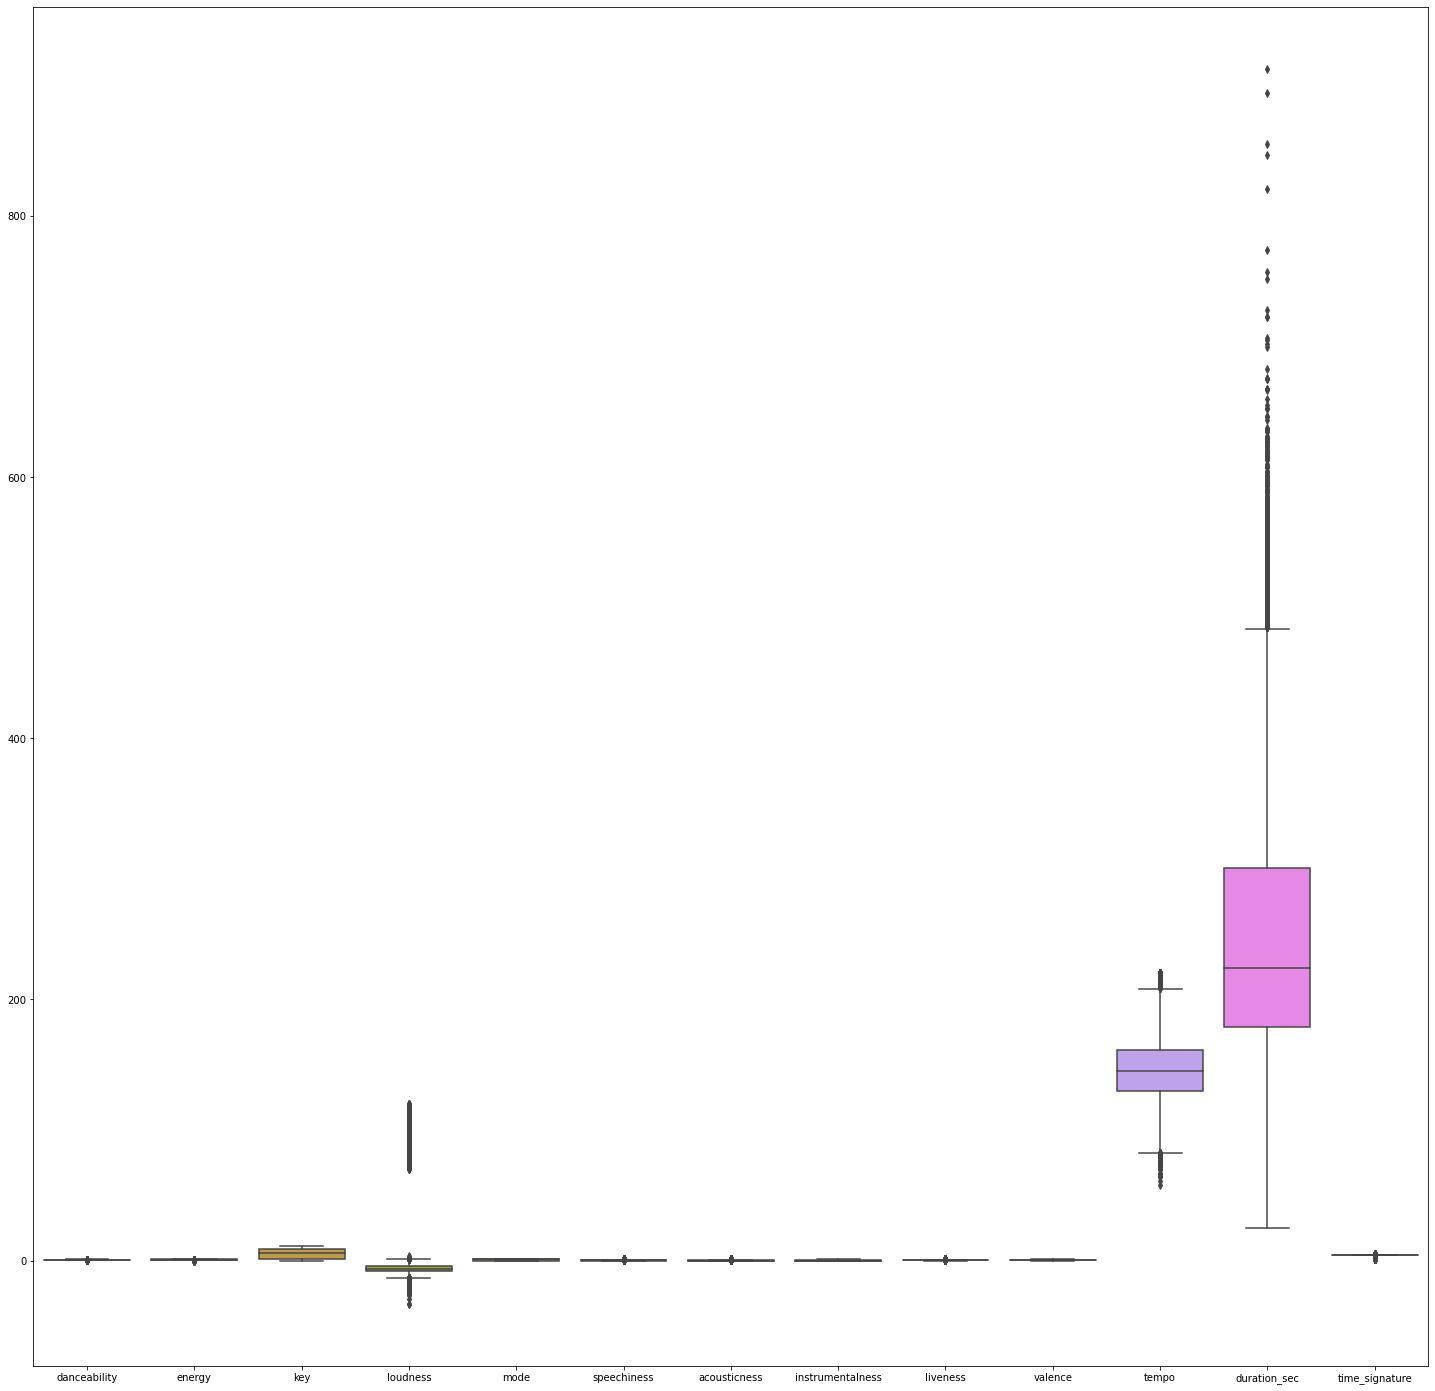

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = df.select_dtypes(exclude='object').columns
plt.figure(figsize=(25,25))
sns.boxplot(data=df)
plt.show()    




(42305, 13)
(27302, 13)


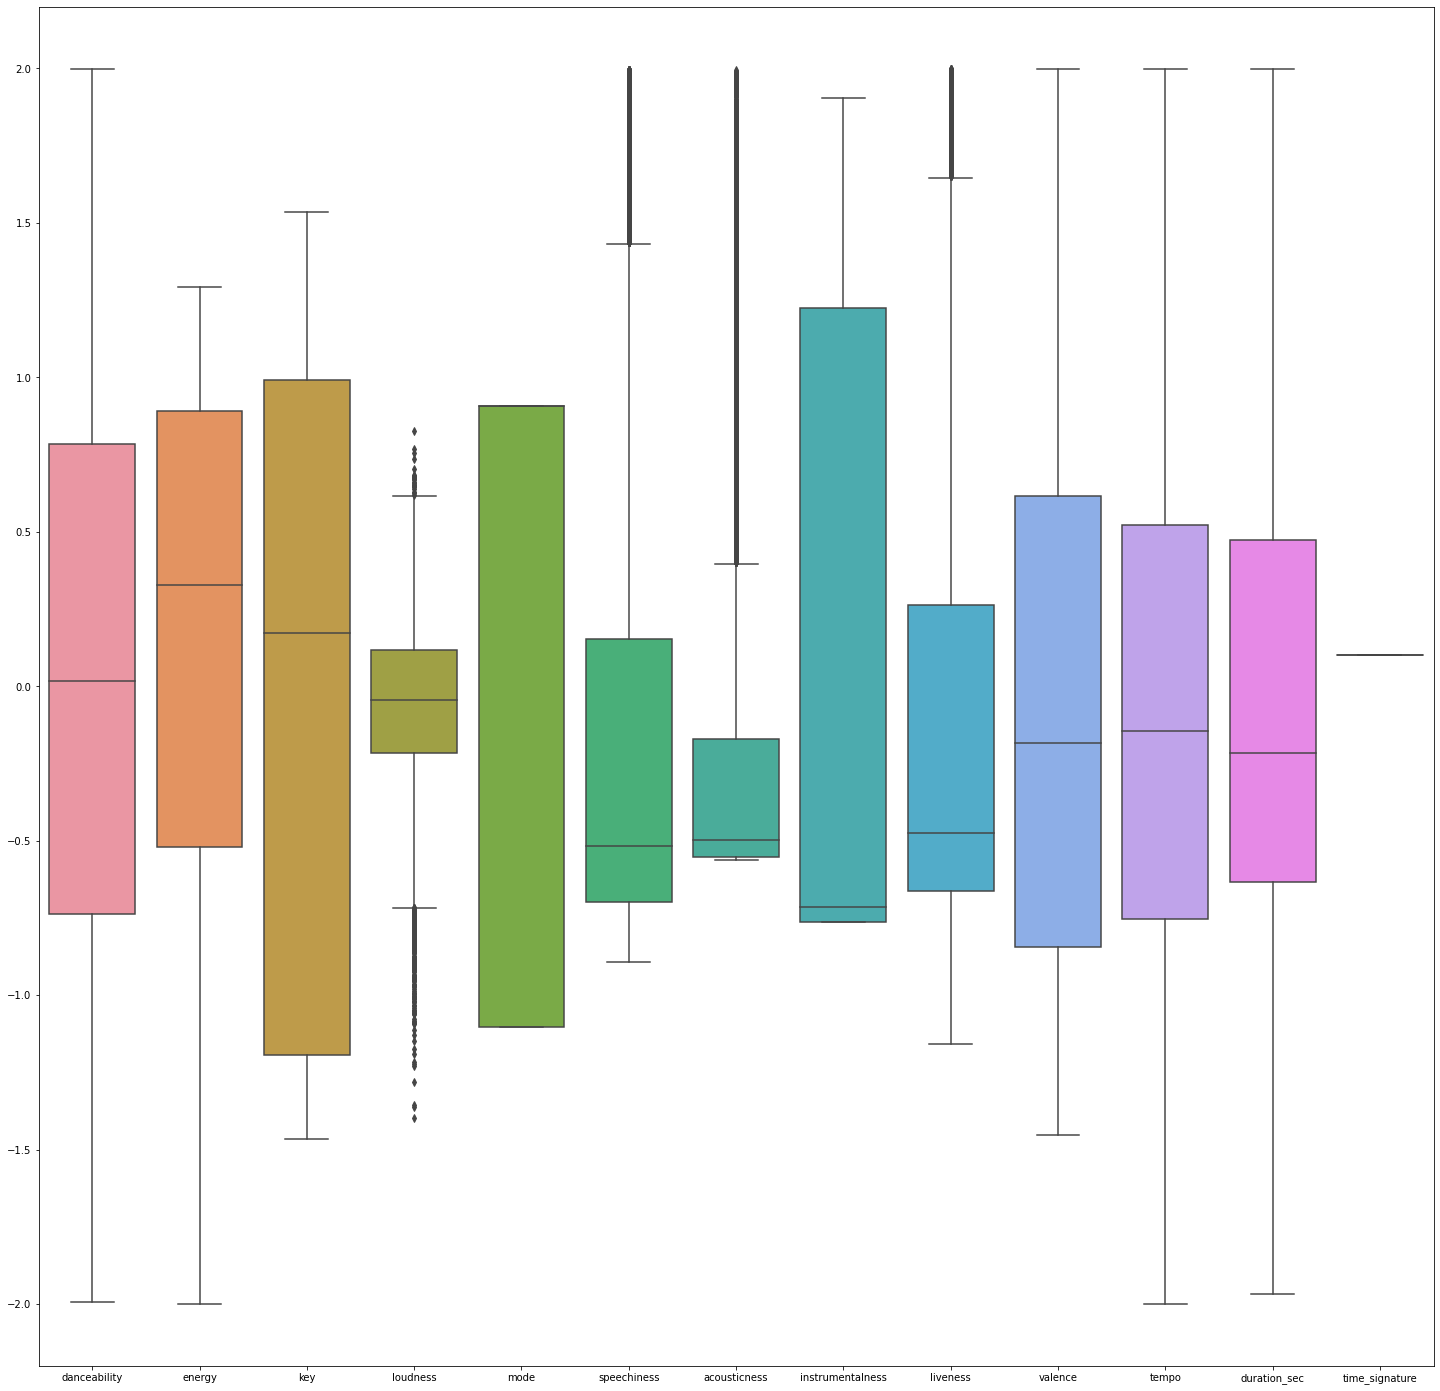

danceability    energy       key  loudness      mode  speechiness  \
1          0.508480 -1.466185  0.717318 -0.166221  0.905517    -0.453057   
4          1.012900 -0.753535 -0.919298 -0.208202  0.905517     1.239945   
6          0.502095 -0.514172  0.717318  0.127838  0.905517     0.003483   
11         0.617026  0.922008 -1.192067  0.169628  0.905517     1.065572   
12         1.185297 -0.008245  0.717318  0.010234  0.905517    -0.258076   
...             ...       ...       ...       ...       ...          ...   
42300     -0.711069 -0.378170 -0.373759  0.033333  0.905517    -0.841432   
42301     -0.781305  0.029836 -1.464837 -0.232547 -1.104341    -0.702727   
42302     -1.777377  0.318160  0.717318  0.229436  0.905517    -0.682119   
42303     -1.036708  0.862167  0.171779  0.068892 -1.104341    -0.771683   
42304     -0.704684  0.992729  0.990087 -0.035102  0.905517    -0.594933   

       acousticness  instrumentalness  liveness   valence     tempo  \
1          1.784518         -0.763370 -0.547231 -0.999586 -1.358564   
4          0.707390         -0.763370 -0.273841  1.003008  0.021554   
6         -0.414229         -0.742334 -0.513057 -1.368372 -0.698197   
11         0.291759         -0.756628 -0.182711 -0.759446 -0.962914   
12        -0.497941         -0.753688  0.683023 -0.840922  0.104677   
...             ...               ...       ...       ...       ...   
42300     -0.378520         -0.762440 -0.530144  0.158231  0.106480   
42301     -0.431205         -0.763321 -0.051712  0.111061  0.102915   
42302     -0.410717         -0.762718  0.973499 -0.999586  0.312902   
42303     -0.559694         -0.683540 -0.891815  0.561323  0.107696   
42304     -0.551855         -0.763223  1.138672 -0.956704  0.317599   

                 type  duration_sec  time_signature      genre  \
1      audio_features     -0.256450        0.102184  Dark Trap   
4      audio_features     -1.237451        0.102184  Dark Trap   
6      audio_features     -1.684244        0.102184  Dark Trap   
11     audio_features     -1.315154        0.102184  Dark Trap   
12     audio_features     -0.848936        0.102184  Dark Trap   
...               ...           ...             ...        ...   
42300  audio_features      0.180630        0.102184  hardstyle   
42301  audio_features     -0.392430        0.102184  hardstyle   
42302  audio_features     -0.159321        0.102184  hardstyle   
42303  audio_features      0.705126        0.102184  hardstyle   
42304  audio_features     -0.858649        0.102184  hardstyle   

                    song_name  
1                   Pathology  
4                       Venom  
6          kamikaze (+ pulse)  
11     Troll Under the Bridge  
12                1000 Rounds  
...                       ...  
42300                 No Name  
42301                 No Name  
42302                 No Name  
42303                 No Name  
42304                 No Name  

[27302 rows x 16 columns]

In [4]:
from sklearn.preprocessing import StandardScaler

scaled_values = StandardScaler().fit_transform(df[numeric_columns])

df2=pd.DataFrame(scaled_values,columns=df[numeric_columns].columns)


print(df2.shape)
threshold = 2
selected_rows= (df2<threshold).all(axis=1)  & (df2>-threshold).all(axis=1)
selected_index=df[~selected_rows].index
df2.drop(index=selected_index,inplace=True) # for analysis
ndf=df.drop(index=selected_index)  # for interpretation
ndf.reset_index(inplace = True, drop = True) # to reset the index 
print(df2.shape)

# Replacing the values from df and df2
df[numeric_columns] = df2
df = df.dropna()

plt.figure(figsize=(25,25))
sns.boxplot(data=df2)
plt.show() 
display(df)

# Part 3.A.i

In [5]:
# Description: Find the statistical summaries.

display(df.describe().T)
display(df.describe(include='object').T)

count      mean           std       min       25%  \
danceability      27302.0  0.010284  9.228090e-01 -1.994469 -0.736610   
energy            27302.0  0.136164  8.599731e-01 -1.999313 -0.519612   
key               27302.0 -0.000442  1.001382e+00 -1.464837 -1.192067   
loudness          27302.0 -0.059278  2.569156e-01 -1.397187 -0.216733   
mode              27302.0 -0.019833  1.001792e+00 -1.104341 -1.104341   
speechiness       27302.0 -0.168148  7.418345e-01 -0.892952 -0.698764   
acousticness      27302.0 -0.235886  5.309052e-01 -0.562913 -0.553963   
instrumentalness  27302.0  0.037326  1.004757e+00 -0.763370 -0.763366   
liveness          27302.0 -0.177270  6.763082e-01 -1.158370 -0.661712   
valence           27302.0 -0.067042  9.134632e-01 -1.451135 -0.844138   
tempo             27302.0 -0.065062  8.486061e-01 -1.999890 -0.754144   
duration_sec      27302.0 -0.030216  8.569521e-01 -1.965918 -0.635252   
time_signature    27302.0  0.102184  2.548009e-14  0.102184  0.102184   

                       50%       75%       max  
danceability      0.016829  0.783038  1.996202  
energy            0.329040  0.889368  1.291933  
key               0.171779  0.990087  1.535626  
loudness         -0.045358  0.116528  0.824647  
mode              0.905517  0.905517  0.905517  
speechiness      -0.518050  0.154078  1.992918  
acousticness     -0.496184 -0.171875  1.995261  
instrumentalness -0.715634  1.224295  1.903931  
liveness         -0.476035  0.261547  1.998710  
valence          -0.184826  0.617069  1.997873  
tempo            -0.145236  0.522847  1.998627  
duration_sec     -0.217598  0.472017  1.996940  
time_signature    0.102184  0.102184  0.102184

count unique              top   freq
type       27302      1   audio_features  27302
genre      27302     15  Underground Rap   3422
song_name  27302   9147          No Name  14978

# Part 3.A.ii

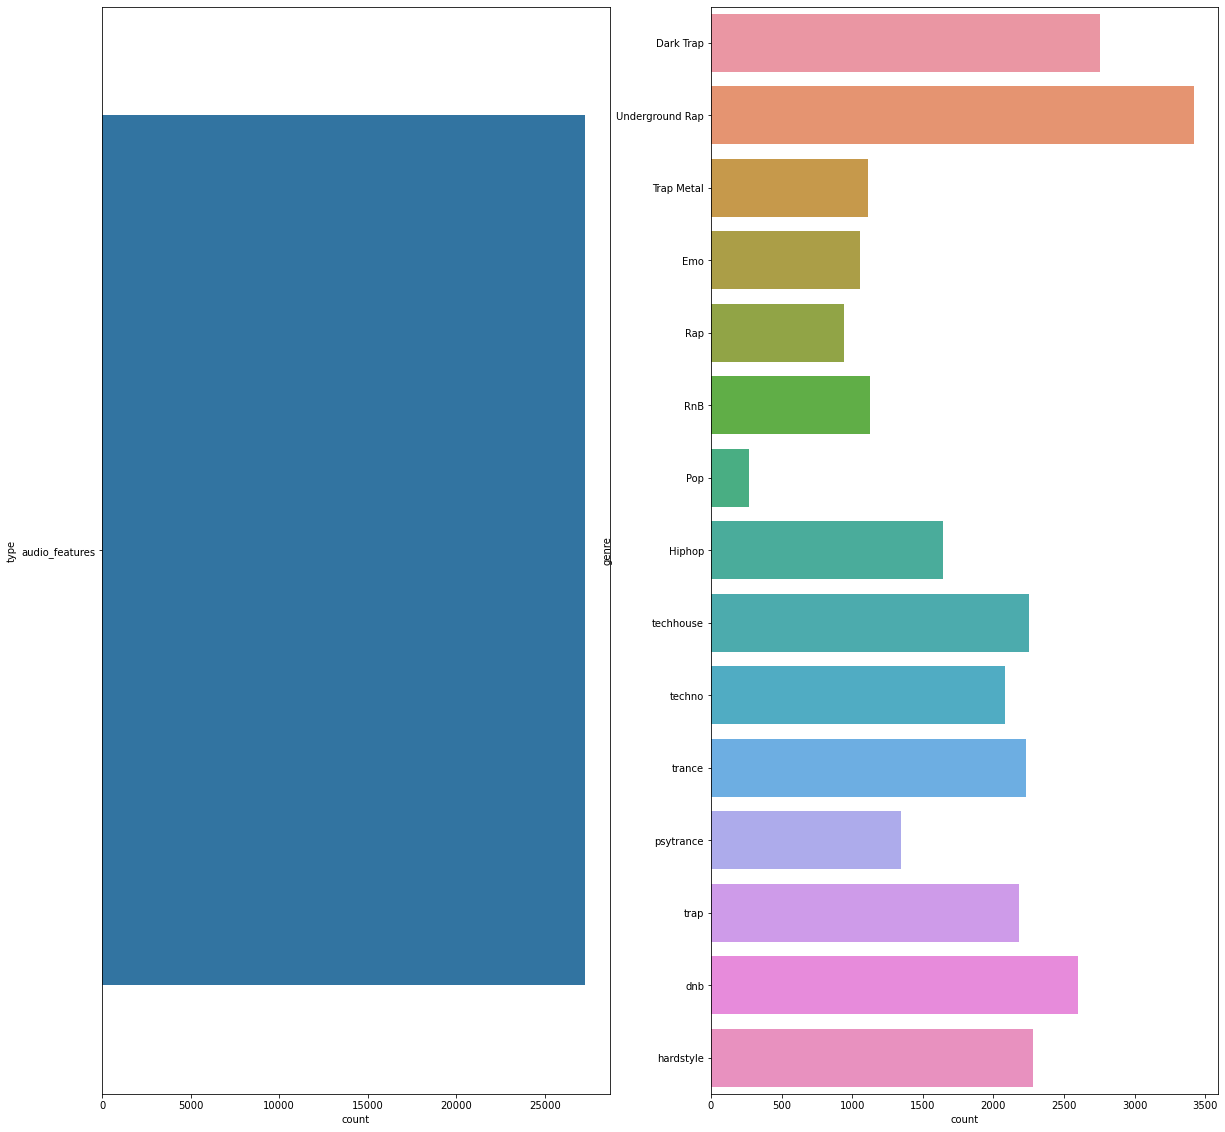

In [6]:
# Description: Make univariate graphs (i.e., graphs based on single variable).
# Categorical univariate plots


# Removed song_name as there are too many different song names.
cat_columns = df.select_dtypes(include='object').columns.drop('song_name')
num_columns = df2.select_dtypes(exclude='object').columns

_, axes = plt.subplots(1,2, figsize=(20,20))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()



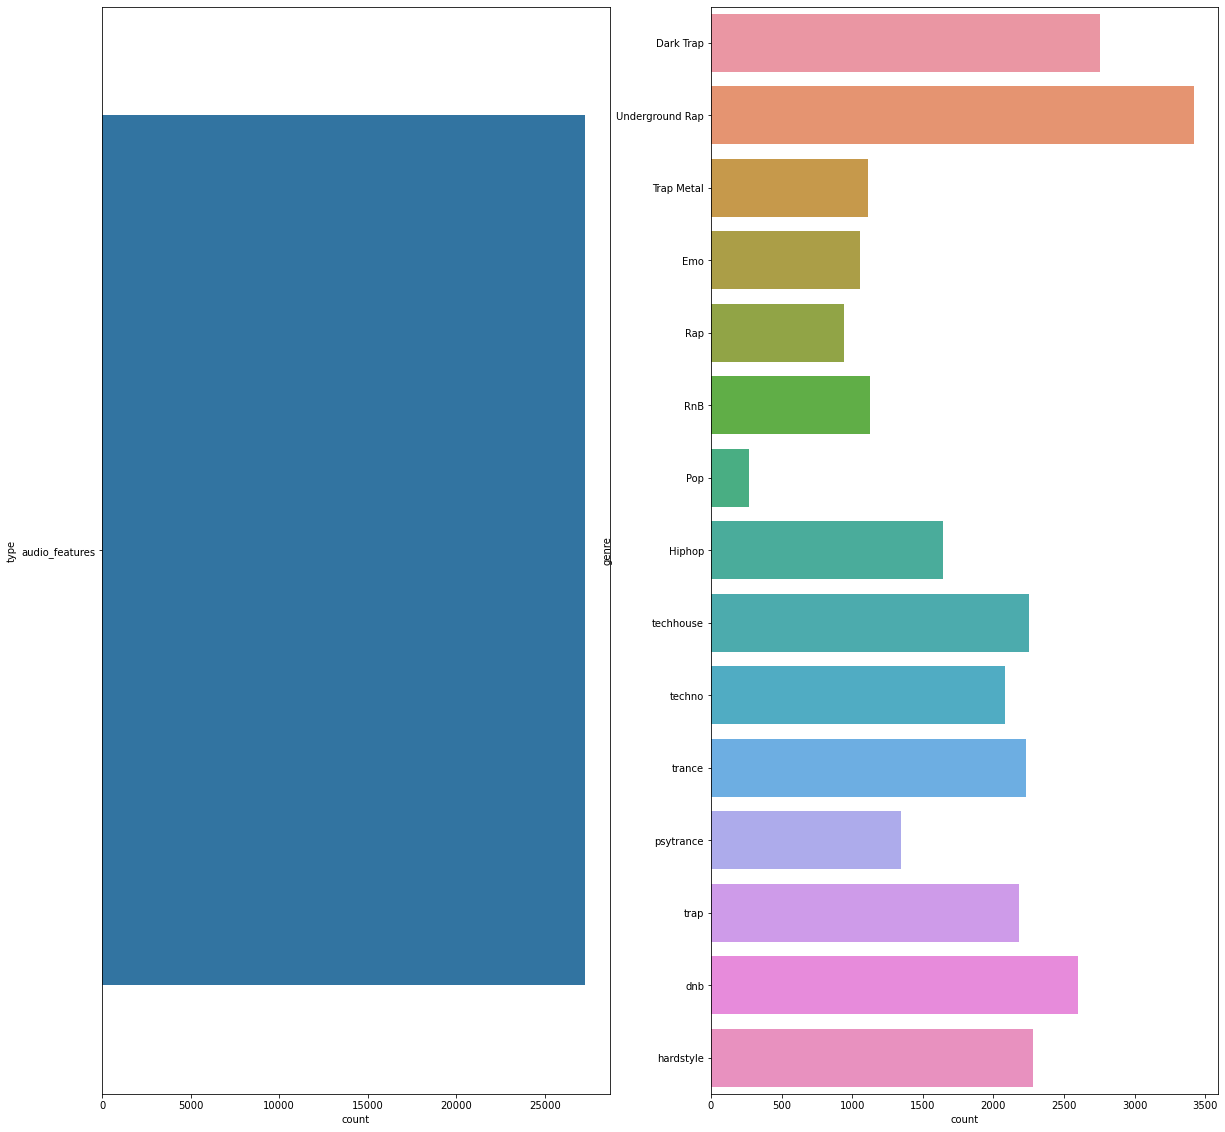

In [7]:
# Description: Make univariate graphs (i.e., graphs based on single variable).
# Categorical univariate plots


# Removed song_name as there are too many different song names.
cat_columns = df.select_dtypes(include='object').columns.drop('song_name')
num_columns = df2.select_dtypes(exclude='object').columns

_, axes = plt.subplots(1,2, figsize=(20,20))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()

# Part 3.A.iii

danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.403753 -0.011311 -0.266442  0.099530   
energy               -0.403753  1.000000  0.035738  0.531240 -0.044437   
key                  -0.011311  0.035738  1.000000 -0.019013 -0.264438   
loudness             -0.266442  0.531240 -0.019013  1.000000 -0.005470   
mode                  0.099530 -0.044437 -0.264438 -0.005470  1.000000   
speechiness           0.253007 -0.168387 -0.021849  0.079381  0.058074   
acousticness          0.174366 -0.391032  0.004236 -0.148253 -0.009840   
instrumentalness     -0.047286  0.281819  0.063000 -0.239873 -0.020092   
liveness             -0.223081  0.185235 -0.018841  0.165674 -0.005551   
valence               0.347087 -0.050309  0.026986  0.065488  0.033266   
tempo                -0.254601  0.038248  0.004162  0.266812 -0.029027   
duration_sec         -0.029675  0.251627  0.059196 -0.152644 -0.043566   
time_signature             NaN       NaN       NaN       NaN       NaN   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.253007      0.174366         -0.047286 -0.223081   
energy              -0.168387     -0.391032          0.281819  0.185235   
key                 -0.021849      0.004236          0.063000 -0.018841   
loudness             0.079381     -0.148253         -0.239873  0.165674   
mode                 0.058074     -0.009840         -0.020092 -0.005551   
speechiness          1.000000      0.221367         -0.374850  0.064697   
acousticness         0.221367      1.000000         -0.288545 -0.056901   
instrumentalness    -0.374850     -0.288545          1.000000 -0.097089   
liveness             0.064697     -0.056901         -0.097089  1.000000   
valence              0.257005      0.150804         -0.256488 -0.020648   
tempo                0.210258      0.041544         -0.201420  0.052875   
duration_sec        -0.290151     -0.245351          0.581328 -0.109003   
time_signature            NaN           NaN               NaN       NaN   

                   valence     tempo  duration_sec  time_signature  
danceability      0.347087 -0.254601     -0.029675             NaN  
energy           -0.050309  0.038248      0.251627             NaN  
key               0.026986  0.004162      0.059196             NaN  
loudness          0.065488  0.266812     -0.152644             NaN  
mode              0.033266 -0.029027     -0.043566             NaN  
speechiness       0.257005  0.210258     -0.290151             NaN  
acousticness      0.150804  0.041544     -0.245351             NaN  
instrumentalness -0.256488 -0.201420      0.581328             NaN  
liveness         -0.020648  0.052875     -0.109003             NaN  
valence           1.000000  0.064895     -0.179752             NaN  
tempo             0.064895  1.000000     -0.117591             NaN  
duration_sec     -0.179752 -0.117591      1.000000             NaN  
time_signature         NaN       NaN           NaN             NaN

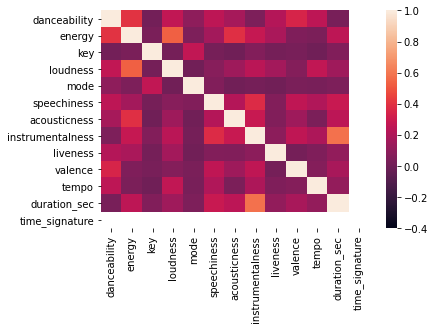

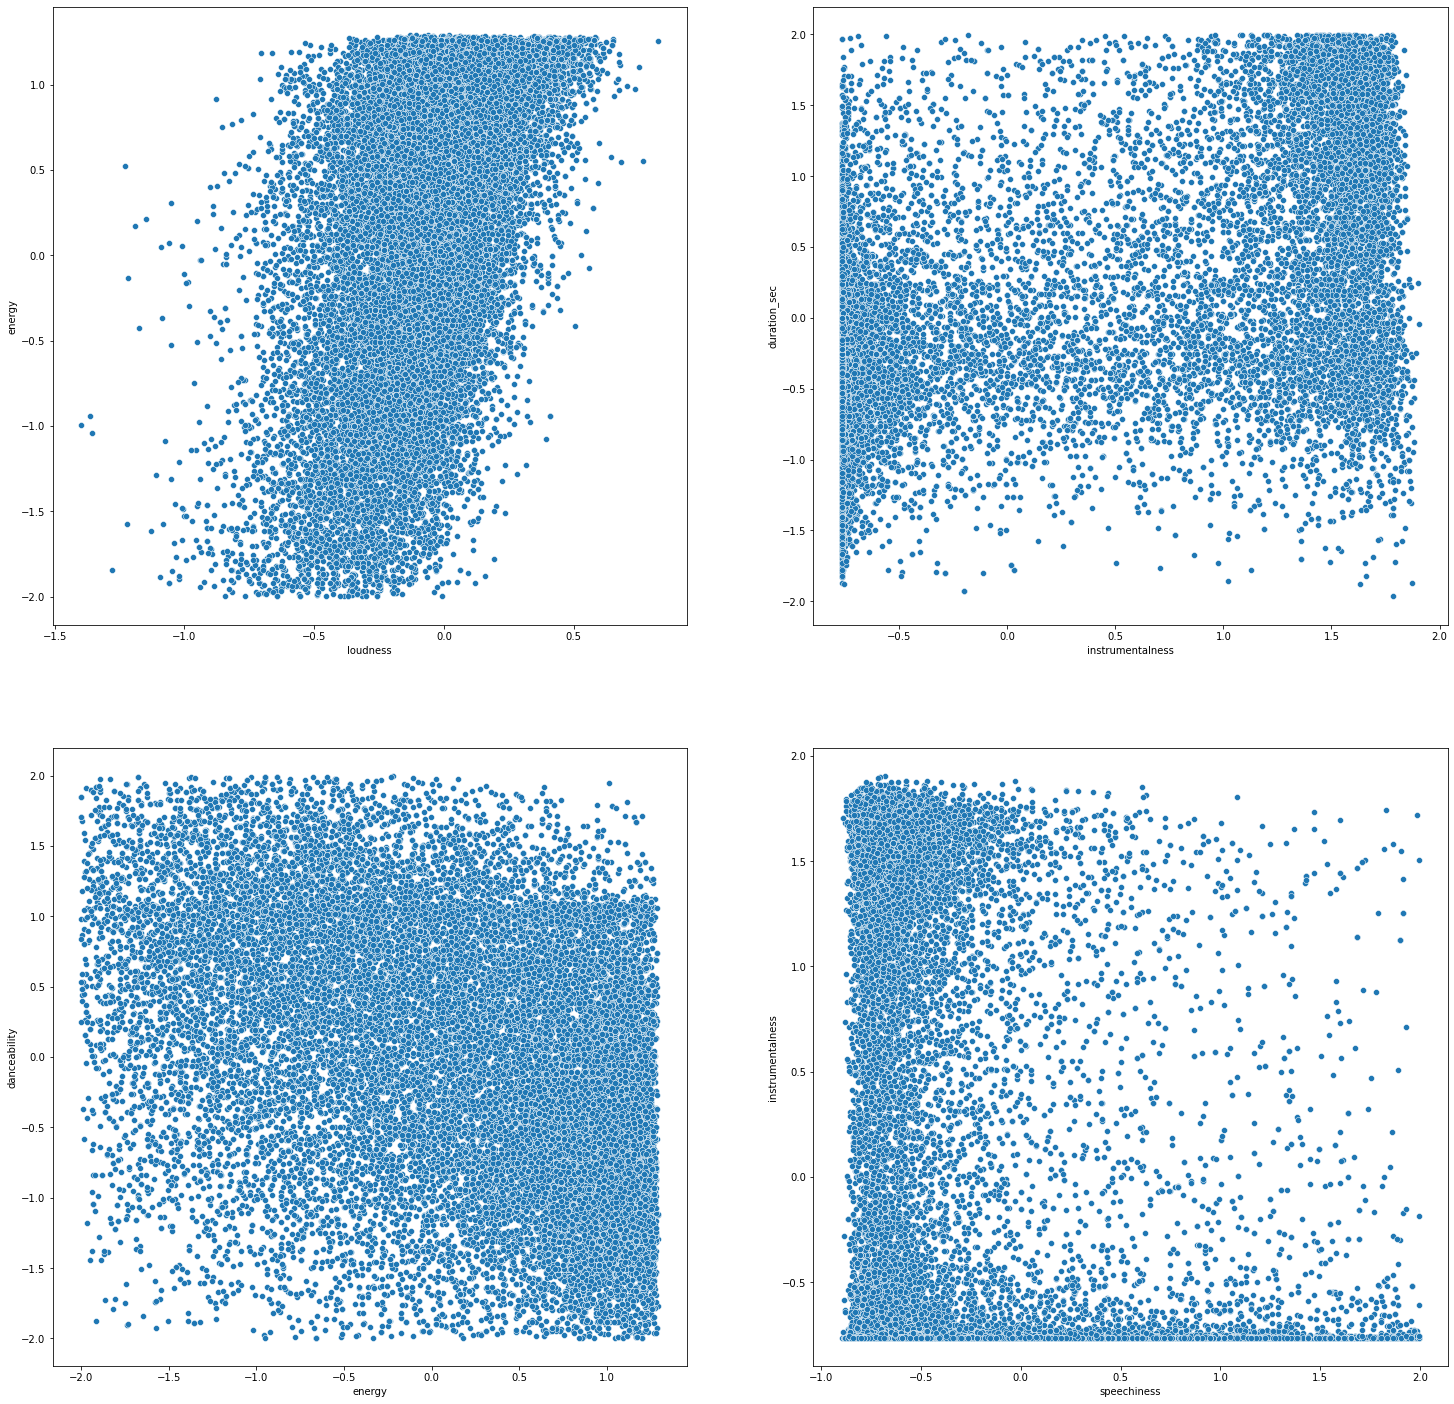

In [8]:
# Description: Prepare bivariate plots (i.e., plots based on two variables).

# Changing all negative values to positive inorder to set a limit in heatmap.
corr = df2.corr().apply(lambda x: abs(x))
display(df.corr())
# Placing a minimum limit to check for correlated values.
sns.heatmap(corr,vmin=-0.4)

# As seen from the following heatmap, the only columns that are correlated:
# Instrumentalness vs duration_sec
# Loudness vs Energy

_, axes = plt.subplots(2,2, figsize=(25,25))
sns.scatterplot(x='loudness', y='energy', data=df, ax=axes.flatten()[0])
sns.scatterplot(x='instrumentalness', y='duration_sec', data=df, ax=axes.flatten()[1])
sns.scatterplot(x='energy', y='danceability', data=df, ax=axes.flatten()[2])
sns.scatterplot(x='speechiness', y='instrumentalness', data=df, ax=axes.flatten()[3])
plt.show()

# Part 3.A.iii

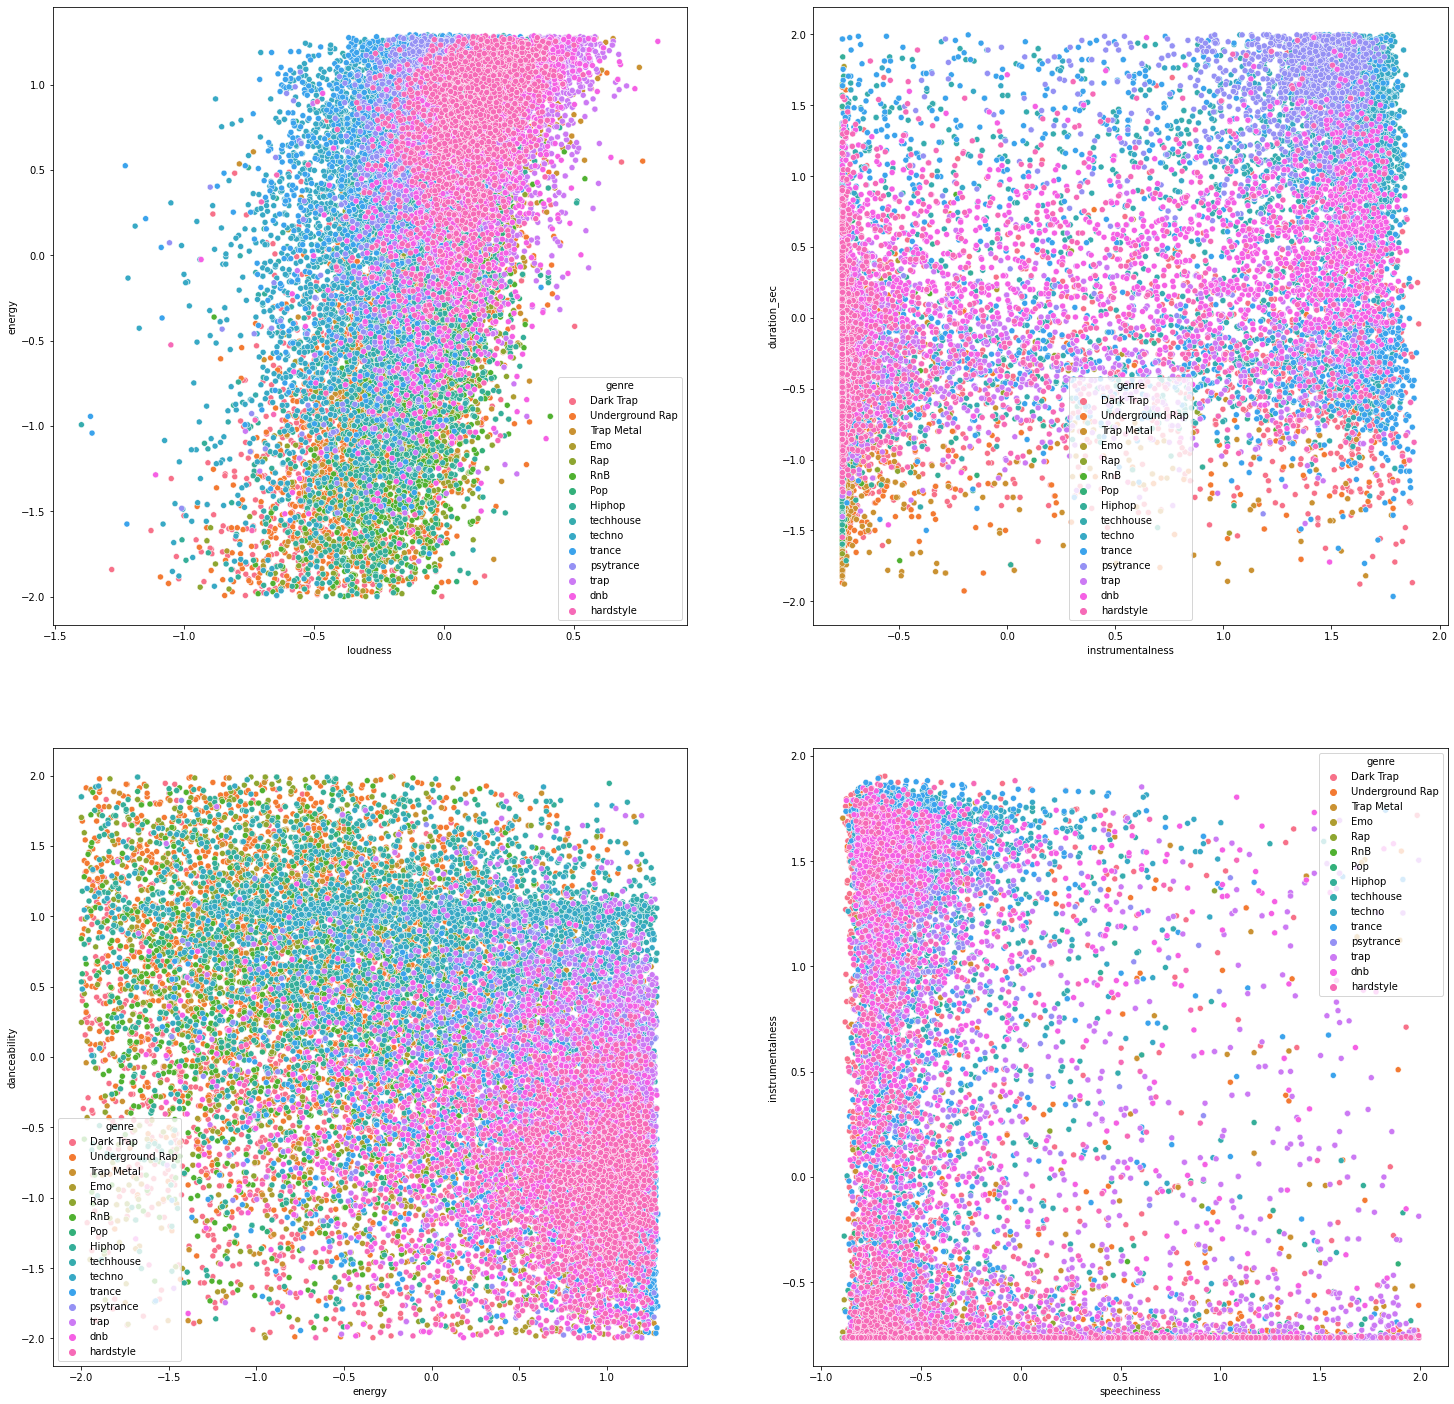

In [9]:
_, axes = plt.subplots(2,2, figsize=(25,25))
sns.scatterplot(x='loudness', y='energy',hue='genre', data=df, ax=axes.flatten()[0])
sns.scatterplot(x='instrumentalness', y='duration_sec', hue='genre', data=df, ax=axes.flatten()[1])
sns.scatterplot(x='energy', y='danceability', hue='genre',data=df, ax=axes.flatten()[2])
sns.scatterplot(x='speechiness', y='instrumentalness', hue='genre',data=df, ax=axes.flatten()[3])
plt.show()

<Figure size 432x288 with 0 Axes>

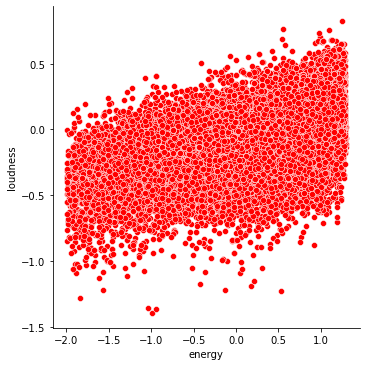

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('data/Regression-2.csv', delimiter =',')
plt.figure()
sns.relplot(x='energy', y='loudness', color = 'r', marker = 'o',kind='scatter',data=df)
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show()